Jesse Cook
1/17/19
Phsx 218

# Plotting Code

To do equations, surround it in \$.

$\frac{a}{b}$ = \frac{a}{b}

$\sqrt{a}$ = \sqrt{a}

$\alpha \beta$ = \alpha \beta

$\alpha = \frac{\Delta L}{L \Delta T}$

Accepted Value = 81.7 +/- 4.1(ohms)

Series R1 = 99.075
Series R2 = 23.775
Series Individual Resistance = 122.85 +/- 0.128741641112
Series Combined Resistance   = 123.25 +/- 0.128741641112
Series Actual Resistance     = 122.8 +/- 0.141421356237

Parallel R1 = 97.6470588235
Parallel R2 = 23.1627906977
Parallel Individual Resistance = 18.7218045113 +/- 0.116478024396
Parallel Combined Resistance   = 16.9387755102 +/- 0.116478024396
Parallel Actual Resistance     = 19.2484527687 +/- 0.141421356237



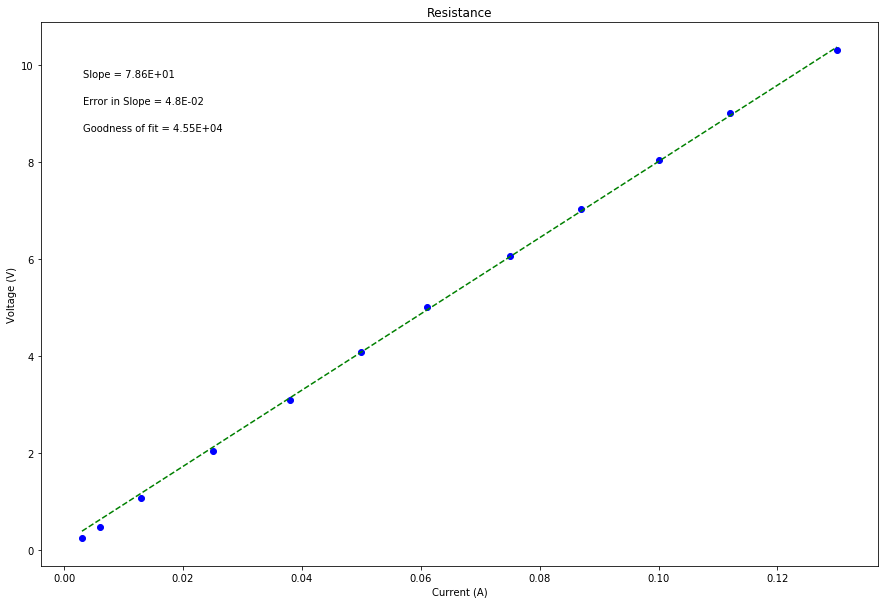

In [24]:
#functions and imports
import numpy as np
import matplotlib.pyplot as plt

def rule3(dA,dB,dC=0.0,dD=0.0,dE=0.0,dF=0.0,dG=0.0,dH=0.0,dI=0.0):
    return np.sqrt(dA**2+dB**2+dC**2+dD**2+dE**2+dF**2+dG**2+dH**2+dI**2)

def rule4(value,A,dA,B,dB,C=1.0,dC=0.0,D=1.0,dD=0.0,E=1.0,dE=0.0,F=1.0,dF=0.0,G=1.0,dG=0.0,H=1.0,dH=0.0,I=1.0,dI=0.0):
    return value*np.sqrt((dA/A)**2+(dB/B)**2+(dC/C)**2+(dD/D)**2+(dE/E)**2+(dF/F)**2+(dG/G)**2+(dH/H)**2+(dI/I)**2)

#Single Unknown
V=np.array([0.245,0.476,1.080,2.050,3.095,4.085,5.010,6.060,7.04,8.05,9.01,10.32])
I=np.array([0.003,0.006,0.013,0.025,0.038,0.050,0.061,0.075,0.087,0.100,0.112,0.13])
dV=np.array([0.001,0.001,0.002,0.010,0.005,0.010,0.005,0.020,0.01,0.01,0.02,0.02])

print("Accepted Value = 81.7 +/- 4.1(ohms)")
print("")

#Series Circuit
V1=3.963

V2=0.951

aI=0.04

Vtot=4.930

tR1=(V1/aI)
tR2=(V2/aI)

aR1=98.9
aR2=23.9

tRtot=tR1+tR2

aRtot=aR1+aR2

cRtot=(Vtot)/aI

dV1=0.005

dV2=0.001

dI=0.0001

dVtot=0.005

dtR1=rule4(tR1,V1,dV1,aI,dI)
dtR2=rule4(tR2,V2,dV2,aI,dI)

daR1=0.1
daR2=0.1

dtRtot=rule3(dtR1,dtR2)

dcRtot=rule4(cRtot,Vtot,dVtot,aI,0.00001)

daRtot=rule3(daR1,daR2)

print("Series R1 = " + str(tR1))
print("Series R2 = " + str(tR2))

print("Series Individual Resistance = "+ str(tRtot) +" +/- "+ str(dcRtot))
print("Series Combined Resistance   = "+ str(cRtot) +" +/- "+ str(dcRtot))
print("Series Actual Resistance     = "+ str(aRtot) +" +/- "+ str(daRtot))
print("")

#Parallel Circuit

Vtot=4.98

I1=0.051

I2=0.215

Itot=0.294

tR1=(Vtot/I1)
tR2=(Vtot/I2)

aR1=98.9
aR2=23.9

tRtot=1/(1/tR1+1/tR2)

cRtot=(Vtot/Itot)

aRtot=1/(1/aR1+1/aR2)
#err
daV=0.04

dI1=0.001
dI2=0.001

dItot=0.002

dtR1=rule4(tR1,Vtot,daV,I1,dI1)
dtR2=rule4(tR2,Vtot,daV,I2,dI2)

daR1=0.1
daR2=0.1

dtRtot=rule3(1/dtR1,1/dtR2)

dcRtot=rule4(cRtot,Vtot,dVtot,Itot,dItot)

daRtot=rule3(daR1,daR2)

print("Parallel R1 = " + str(tR1))
print("Parallel R2 = " + str(tR2))

print("Parallel Individual Resistance = "+ str(tRtot) +" +/- "+ str(dcRtot))
print("Parallel Combined Resistance   = "+ str(cRtot) +" +/- "+ str(dcRtot))
print("Parallel Actual Resistance     = "+ str(aRtot) +" +/- "+ str(daRtot))
print("")


#Jaylene's Plotting Code

x=I
y=V
dy=dV
#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Resistance')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


